In [2]:
import investpy as inv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sci
import seaborn as sns
from scipy.optimize import minimize

In [4]:
lista_de_empresas = ['PETR4','USIM5','MGLU3','VALE3']

#Escolher entre Titulos ou Juros_Futuro se quiser adicionar, pegar planilha no invest
#titulos = ['NTNB2022','NTNB2026']
#juros_futuro = ['DI1F22','DI1F25','DI1F27']

inicio = '04/01/2021'
fim = '10/03/2021'

colunas =  lista_de_empresas # + titulos #+ juros_futuro
df = pd.DataFrame()

In [3]:
colunas

['BEEF3', 'MRFG3', 'MRVE3', 'HAPV3', 'ITUB4']

In [5]:


for empresa in lista_de_empresas:
    empresa = inv.get_stock_historical_data(empresa, country= 'brazil',from_date= inicio, to_date= fim ,interval='Daily')
    df = df.append(empresa['Close'])

In [84]:
#Se escolheu titulos, rodar essa célula com a planilha do excel na pasta
for titulo in titulos:
    titulo_tesouro = pd.read_csv(titulo + '.csv',sep = ',')
    reverso_titulo = titulo_tesouro.iloc[::-1]
    for i in range (len(reverso_titulo['Data'])):
        z = reverso_titulo['Data'][i].split('.')
        z = z[::-1]
        reverso_titulo['Data'][i] = "-".join(z)
    reverso_titulo['Data'] = pd.to_datetime(reverso_titulo['Data'])
    reverso_titulo.index = reverso_titulo['Data']
    
    df = df.append(reverso_titulo['Último'])

C:\Users\yuri_\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [50]:
#Se escolheu juros, rodar essa célula com a planilha do excel na pasta
for DI1F in juros_futuro:
    titulo = pd.read_excel(DI1F + '.xlsx')
    reverso_titulo = titulo.iloc[::-1]
    reverso_titulo['Data'] = pd.to_datetime( reverso_titulo['Data'])
    reverso_titulo.index = reverso_titulo['Data']
    x = reverso_titulo.groupby(reverso_titulo.index).first()
    df = df.append(x['Fechamento'])

In [6]:
#Padrozinação do dataframe, observar se o número de colunas adicionadas bate com o dataframe
df= df.transpose() 
df.columns = colunas
df = df.dropna()

In [7]:
for coluna in colunas:
    try:
        df[coluna] = pd.to_numeric(df[coluna])  
    except:
        df[coluna] = df[coluna].str.replace('.','')
        df[coluna] = df[coluna].str.replace(',','.')
        df[coluna] = pd.to_numeric(df[coluna])
df        

,PETR4,USIM5,MGLU3,VALE3
2021-01-04,28.91,14.94,25.20,91.46
2021-01-05,30.04,15.10,24.76,93.00
2021-01-06,30.07,15.72,23.44,95.61
2021-01-07,31.00,16.59,23.16,102.32
2021-01-08,31.12,16.51,23.84,102.00
2021-01-11,30.86,16.71,23.49,101.98
2021-01-12,30.63,16.48,24.20,99.19
2021-01-13,29.15,15.48,24.02,96.22
2021-01-14,29.45,15.76,23.73,97.80
2021-01-15,28.12,15.02,23.96,93.55


Normalizando os dados...

In [68]:
#Log do retorno diário
retorno = (df/df.shift(1) - 1)
retorno.head()

,PETR4,USIM5,MGLU3,VALE3
2021-01-04,NaN,NaN,NaN,NaN
2021-01-05,0.039087,0.010710,-0.017460,0.016838
2021-01-06,0.000999,0.041060,-0.053312,0.028065
2021-01-07,0.030928,0.055344,-0.011945,0.070181
2021-01-08,0.003871,-0.004822,0.029361,-0.003127


1.0

In [166]:

np.random.seed(42) #semente aleatória
num_ports = 10000
all_weights = np.zeros((num_ports, len(df.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)
i = 0
for x in range(num_ports):
    # Weights
    weights = np.array(np.random.random(len(df.columns)))
    weights = weights/np.sum(weights)
    
    # Save weights
    all_weights[x,:] = weights

    # Expected return
    ret_arr[x] = np.sum( (retorno.mean() * weights)) # 252 serve para anualizar o indice 
    #Multiplicação 252 esta certa?
    # Tem certeza?
    
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(retorno.cov(), weights)))

    # Sharpe Ratio
    sharpe_arr[x] = (ret_arr[x]-0.00034)/vol_arr[x]
    
# Demora um pouco    

In [167]:
# Numero de dados
vol_arr.shape

(1000,)

In [168]:
print("Máximo Shape Ratio = ", sharpe_arr.max())
print("Localizado na linha = ", sharpe_arr.argmax())
linha = sharpe_arr.argmax()

Máximo Shape Ratio =  0.07194835221630878
Localizado na linha =  651


In [169]:
print(all_weights[linha,:])
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]
min_sr_ret_vol = ret_arr[vol_arr.argmin()]
min_sr_vol = vol_arr[vol_arr.argmin()]


[1.61447175e-04 6.12655095e-01 5.61581375e-02 3.31025320e-01]


In [ ]:
eixo_x = np.zeros(11)
eixo_y =np.zeros(11)
for i in range(0,110,10):
    eixo
    

In [170]:
retorno.head()

,PETR4,USIM5,MGLU3,VALE3
2021-01-04,NaN,NaN,NaN,NaN
2021-01-05,0.039087,0.010710,-0.017460,0.016838
2021-01-06,0.000999,0.041060,-0.053312,0.028065
2021-01-07,0.030928,0.055344,-0.011945,0.070181
2021-01-08,0.003871,-0.004822,0.029361,-0.003127


In [171]:
max_sr_vol = vol_arr[sharpe_arr.argmin()]

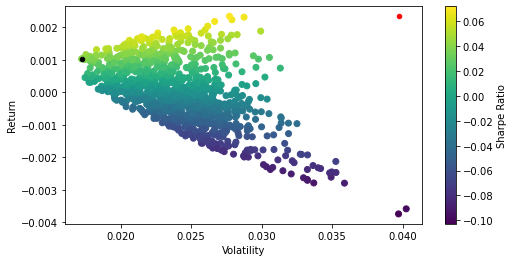

In [172]:
plt.figure(figsize=(8,4))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_vol, max_sr_ret,c='red', s=20) # red dot
plt.scatter(min_sr_vol, min_sr_ret_vol,c='black', s=20) # red dot
plt.savefig('Markowitz.png')
plt.show()


In [25]:
pesos = pd.DataFrame()
pesos['Ativo'] = colunas
pesos['Peso percentual'] = all_weights[linha,:] 
print("Máximo Shape Ratio = ", sharpe_arr.max())
pesos


Máximo Shape Ratio =  1.3367862126761527


,Ativo,Peso percentual
0,PETR4,0.000161
1,USIM5,0.612655
2,MGLU3,0.056158
3,VALE3,0.331025


In [14]:
# Essa parte vamos verificar uma forma mais eficiente de fazer o indice sharpe

In [26]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))
    sr = ret/vol
    return np.array([ret, vol, sr])

def neg_sharpe(weights):
# the number 2 is the sharpe ratio index from the get_ret_vol_sr
    return get_ret_vol_sr(weights)[2] * -1

def check_sum(weights):
    #return 0 if sum of the weights is 1
    return np.sum(weights)-1

In [27]:
cons = ({'type':'eq', 'fun':check_sum})
#limites de peso para cada ação
bounds = ((0,1),(0,1),(0,1),(0,1))
#estimativa de peso para cada ação
init_guess = [0.2,0.2,0.2,0.2]

In [28]:
opt_results = minimize(neg_sharpe, init_guess, method = 'SLSQP', bounds = bounds, constraints = cons)
print(opt_results)


     fun: -1.3385040526496725
     jac: array([ 3.22990991e+00,  1.78813934e-06,  3.50475311e-05, -6.04987144e-06])
 message: 'Optimization terminated successfully'
    nfev: 45
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([0.        , 0.67876722, 0.01833132, 0.30290146])


In [29]:
get_ret_vol_sr(opt_results.x)

array([0.6247466 , 0.46674988, 1.33850405])

In [30]:
def minimizar_volatilidade(weights):
    return(get_ret_vol_sr(weights)[1])


In [34]:
frontier_y = np.linspace(-1,0.75,200)
frontier_x = []

for possible_return in frontier_y:
    cons = ({'type':'eq', 'fun':check_sum},
            {'type':'eq', 'fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimizar_volatilidade,init_guess,method='SLSQP', bounds=bounds, constraints=cons)
    frontier_x.append(result['fun'])

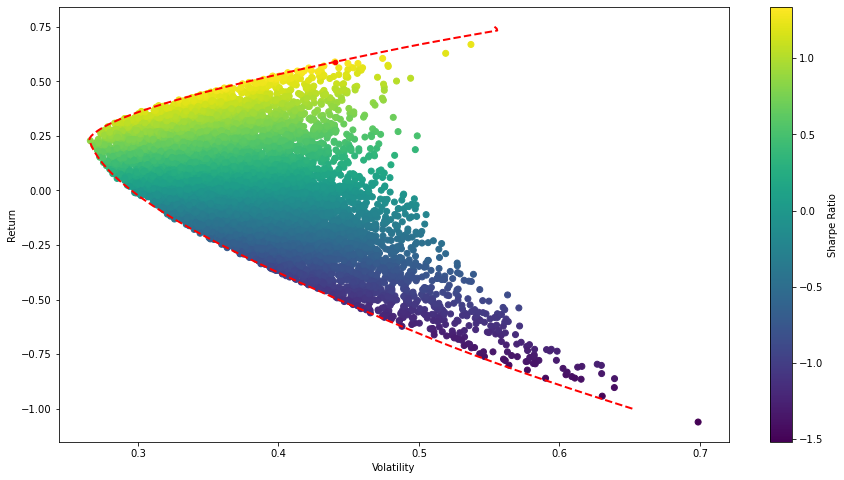

In [35]:

plt.figure(figsize=(15,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_vol, max_sr_ret,c='red', s=20)
plt.plot(frontier_x,frontier_y, 'r--', linewidth=2)
plt.show()

In [33]:
pesos = pd.DataFrame()
pesos['Ativo'] = colunas
pesos['Peso percentual'] = all_weights[linha,:] 

In [26]:
pesos

,Ativo,Peso percentual
0,BEEF3,0.255839
1,MRFG3,0.655239
2,MRVE3,0.048134
3,HAPV3,0.005398
4,ITUB4,0.035390
